# EPA1333 - Computer Engineering for Scientific Computing
## Week 8 - Oct 27, 2016

**Python for Data Analysis**

*Wes McKinney*


In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Time Series and Grouping 

  

## Alcohol consumption in the World

The file ```drinks.csv``` contains some data on alcohol consumption in a number of countries in the world.

### Q1: Read the drinks.csv file into a dataframe, name the columns appropriately.

In [143]:
# Q1: your code here
df1 = pd.read_csv("data/drinks.csv", na_filter=False)
df1.head()
df1.columns = ["Country", "Beer","Spirit", "Wine", "Total_alcohol", "Continent"]
df1.head()

,Country,Beer,Spirit,Wine,Total_alcohol,Continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


### Q2:  How many continents are there? How many countries per continent?

In [144]:
# Q2: your code here
print("There are %.f continents in this dataframe" %len(df1.Continent.unique()))

for x,y in df1.groupby('Continent'):
    print("%s has %.f countries" % (x ,len(y)))

There are 6 continents in this dataframe
AF has 53 countries
AS has 44 countries
EU has 45 countries
NA has 23 countries
OC has 16 countries
SA has 12 countries


### Q3: What is the average beer servings per continent? Which continent has on average the most? Which the least?

In [145]:
# Q3: your code here
print('The average beer servings per continent:')
print(df1.groupby('Continent').mean()[['Beer']])
indexa = df1.groupby("Continent").mean()['Beer'].argmin()
indexb = df1.groupby("Continent").mean()['Beer'].argmax()
print("\nThe continent with on average the least beer servings is %s with %.f servings" 
      %(indexa, df1.groupby("Continent").mean()['Beer'].ix[indexa]))
print("The continent with on average the most beer servings is %s with %.f servings" 
      %(indexb, df1.groupby("Continent").mean()['Beer'].ix[indexb]))

The average beer servings per continent:
                 Beer
Continent            
AF          61.471698
AS          37.045455
EU         193.777778
NA         145.434783
OC          89.687500
SA         175.083333

The continent with on average the least beer servings is AS with 37 servings
The continent with on average the most beer servings is EU with 194 servings


### Q4: Which countries have the highest wine consumption per continent, and how much?


In [149]:
# Q4: your code here
maxwine = df1.groupby('Continent').max()[["Country","Wine"]]
print("WRONG!")
maxwine


WRONG!


,Country,Wine
Continent,,
AF,Zimbabwe,233
AS,Yemen,123
EU,United Kingdom,370
NA,USA,100
OC,Vanuatu,212
SA,Venezuela,221


### Q5: Create a bar chart to plot the maximum wine servings per continent. Put the name of the corresponding country on top of the bar as an extra label.

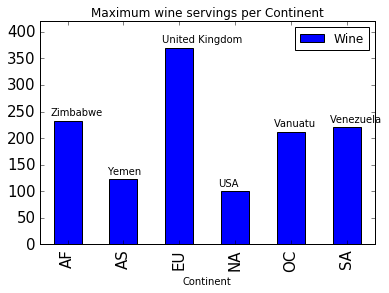

In [147]:
# Q5: your code here
maxwine.plot(kind="bar", fontsize = 15, title = "Maximum wine servings per Continent", ylim = (0,420))



for (i, wine) in enumerate  (maxwine.Wine ):
    plt.text(i -0.3, wine+10, maxwine.Country[i])



### Q6: How many litres of alcohol is consumed in total per continent? Which country consumes the most per continent? Plot the total consumption per continent in a bar chart. Label each bar with the name of the country of that continent with the highest consumption and include that countries consumption.

For example, if the UK has the highest consumption (10) of the EU (100), then draw a bar for the EU, length 100, and label it on top with "UK (10)".

           Total_continent         Country  Total_country
Continent                                                
AF                   159.4        Zimbabwe            9.1
AS                    95.5           Yemen           11.5
EU                   387.8  United Kingdom           14.4
NA                   137.9             USA           11.9
OC                    54.1         Vanuatu           10.4
SA                    75.7       Venezuela            8.3


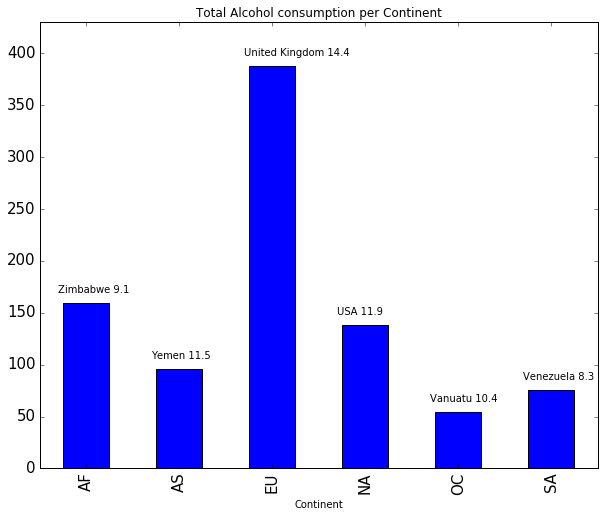

In [151]:
# Q6: your code here
continent_total = df1.groupby('Continent').sum()[['Total_alcohol']]
max_total = df1.groupby('Continent').max()[["Country","Total_alcohol"]]

df2 = continent_total.merge(max_total,how="outer", left_index=True, right_index=True)
df2.columns = ['Total_continent','Country', 'Total_country']
print(df2)
df2.Total_continent.plot(kind='bar',fontsize = 15, figsize = (10,8),title = "Total Alcohol consumption per Continent", ylim = (0,430))

for i in range(len(df2)):
    plt.text(i-0.3, df2.Total_continent[i]+10,"%s %.1f"%( df2.Country[i],df2.Total_country[i]))

## Exercise: Weather

Use the weatherdata in the csv file: ```weather_year```

### Q7: Read the weather_year data into a dataframe.
 

In [114]:
# Q7: your code here
df_weather = pd.read_csv('data/weather_year.csv')

In [115]:

df_weather2 = pd.DataFrame(df_weather[['EDT','Max TemperatureF','Mean TemperatureF','Min TemperatureF']])

### Q8: Print the average max, min and mean temperature in Celsius per Season (Spring, Summer, Autumn, Winter) for the year 2012.


In [116]:
# Q8: your code here
df_weather2.columns = ['date','MaxTempF','MeanTempF','MinTempF']
df_weather2.head()

,date,MaxTempF,MeanTempF,MinTempF
0,2012-3-10,56,40,24
1,2012-3-11,67,49,30
2,2012-3-12,71,62,53
3,2012-3-13,76,63,50
4,2012-3-14,80,62,44


In [117]:
df_weather2.date = pd.to_datetime(df_weather2.date)

In [126]:
df_weather2 = df_weather2.set_index('date')
df_weather2.head()

,MaxTempF,MeanTempF,MinTempF
date,,,
2012-03-10,56,40,24
2012-03-11,67,49,30
2012-03-12,71,62,53
2012-03-13,76,63,50
2012-03-14,80,62,44


In [134]:
def FtoC (F):
    C = (F-31)* (5/9)
    return C

df_weather3 = df_weather2.apply(FtoC)
df_weather3.columns = ['MaxTempC', 'MeanTempC', 'MinTempC']

In [139]:
df_weather3.head()
df_weather3.resample('QS-JUN').mean()

,MaxTempC,MeanTempC,MinTempC
date,,,
2012-03-01,23.975904,17.248996,10.240964
2012-06-01,32.475845,24.830918,16.896135
2012-09-01,18.034188,12.087912,5.940171
2012-12-01,6.691358,1.993827,-2.987654
2013-03-01,5.888889,2.333333,-1.222222
